# ***The Great Giochini***

Import useful libraries

In [208]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
from scipy.interpolate import splev, splrep
import seaborn as sns

Path (select yours, comment others)

In [209]:
path = "C:/Users/markh/Desktop/Università/Healthcare Data/SL4HD/Train2/"
#path = "C:/Users/giuli/OneDrive/Desktop/SL4HD/Train2/"
#path = "C:/Users/hp/OneDrive - Politecnico di Milano/Università/STATISTICAL_LEARNING_FOR_HEALTHCAREDATA/SL4HD/Train2/"

Create files list and dataframe

In [210]:
all_files = glob.glob(path + "*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, names = ["x","y","z","t"])
    li.append(df)

### **Polynomial interpolation of time series**

Let's plot a single time series

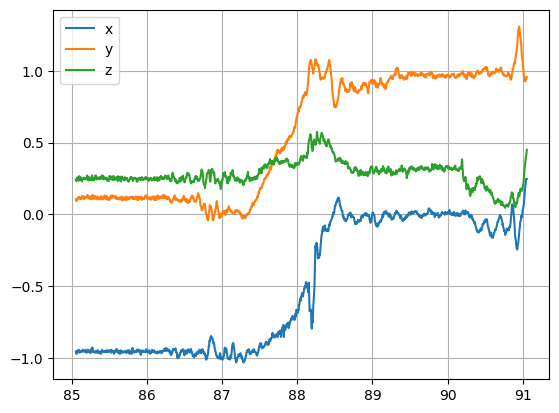

In [211]:
test=250

df = li[test]

x = np.asarray(df.x)
y = np.asarray(df.y)
z = np.asarray(df.z)
t = np.asarray(df.t)

plt.plot(t,x,label='x')
plt.plot(t,y,label='y')
plt.plot(t,z,label='z')

plt.grid()
plt.legend()
plt.show()

This is the polynomial interpolation

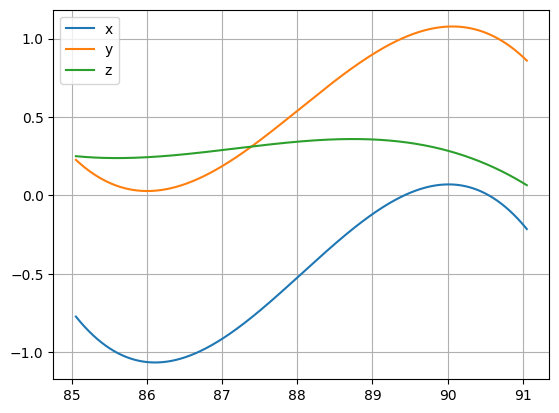

In [212]:
coef_x = np.polyfit(t,x,deg=3,full=False)
poly_x = np.poly1d(coef_x)
plt.plot(t,poly_x(t),label="x")

coef_y = np.polyfit(t,y,deg=3,full=False)
poly_y = np.poly1d(coef_y)
plt.plot(t,poly_y(t),label="y")

coef_z = np.polyfit(t,z,deg=3,full=False)
poly_z = np.poly1d(coef_z)
plt.plot(t,poly_z(t),label="z")

plt.grid()
plt.legend()
plt.show()

Now, we do this for all the time series

In [213]:
def extrapolate(ls,k):

    # Create columns of the output dataset
    columns = []
    for prefix in ['x', 'y', 'z']:
        for i in range(0, k+1):
            columns.append(f"{prefix}_{i}")
    df = pd.DataFrame(columns=columns)

    # Loop over all the .csv tables
    for i in np.arange(len(ls)): #da cambiare con len(ls)

        # Get values from every table
        x = np.asarray(ls[i].x)
        y = np.asarray(ls[i].y)
        z = np.asarray(ls[i].z)
        t = np.asarray(ls[i].t)

        # Get coefficients of the polynomial fit of order k of x, y, z
        coef_x = np.polyfit(t,x,deg=k,full=False)
        coef_y = np.polyfit(t,y,deg=k,full=False)
        coef_z = np.polyfit(t,z,deg=k,full=False)
        
        # Add coefficients to the final dataset
        row = []
        for j in np.arange(k+1):
            row.append(coef_x[j])
        for j in np.arange(k+1):
            row.append(coef_y[j])
        for j in np.arange(k+1):
            row.append(coef_z[j])
        df.loc[i] = row

    return df


df = extrapolate(li,5)
df

,x_0,x_1,x_2,x_3,x_4,x_5,y_0,y_1,y_2,y_3,y_4,y_5,z_0,z_1,z_2,z_3,z_4,z_5
0,-0.00115,0.28788,-28.91097,"1,450.61807","-36,364.36841","364,348.97320",-0.00081,0.20141,-20.03536,995.98887,"-24,743.33457","245,752.20960",0.00142,-0.35484,35.53462,"-1,778.26599","44,469.66175","-444,569.13497"
1,-0.00043,0.08281,-6.33072,241.46204,"-4,594.69360","34,894.77050",0.00002,-0.00442,0.35789,-14.36813,286.46711,"-2,269.50590",-0.00011,0.02274,-1.80944,71.69976,"-1,415.04128","11,129.97522"
2,-0.00077,0.14785,-11.40334,439.02489,"-8,437.03023","64,746.88808",-0.00011,0.02038,-1.54275,58.30836,"-1,100.27878","8,293.21102",0.00019,-0.03473,2.54069,-92.73901,"1,688.51030","-12,265.23404"
3,0.00018,-0.04731,4.89329,-252.53445,"6,502.09927","-66,812.41113",-0.00077,0.20524,-21.92440,"1,170.31185","-31,217.03141","332,880.71677",0.00001,-0.00202,0.16111,-5.61791,68.64012,152.22189
4,0.00045,-0.13516,16.23613,-974.35258,"29,211.20806","-350,005.76923",0.00012,-0.03448,4.09249,-242.67721,"7,190.04924","-85,150.82456",-0.00087,0.26115,-31.18670,"1,860.75296","-55,468.17770","660,886.35807"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,0.00157,-0.96196,235.69792,"-28,869.18646","1,767,645.42096","-43,284,010.30953",0.00172,-1.05296,257.97092,"-31,594.35362","1,934,325.03046","-47,360,977.31786",0.00035,-0.21516,52.75473,"-6,466.49047","396,262.17273","-9,711,659.76488"
464,-0.01217,5.81466,"-1,110.85726","106,096.60623","-5,065,864.97252","96,739,662.28883",0.01226,-5.85869,"1,119.30503","-106,905.48353","5,104,520.93355","-97,477,301.55072",-0.00411,1.96343,-375.50262,"35,902.11635","-1,716,078.21858","32,806,057.80522"
465,-0.01689,8.23930,"-1,607.80829","156,853.66574","-7,650,181.15030","149,229,744.63105",0.01713,-8.36399,"1,632.94597","-159,384.30650","7,777,403.50154","-151,785,093.52308",-0.00546,2.66401,-519.41963,"50,630.89454","-2,467,328.39681","48,088,630.33883"
466,-0.00051,0.27288,-58.47080,"6,263.06904","-335,369.38644","7,181,878.54455",0.00039,-0.21035,45.86423,"-4,996.05112","271,901.18155","-5,914,596.92804",0.00020,-0.11171,24.59544,"-2,703.83020","148,423.53125","-3,254,916.91757"


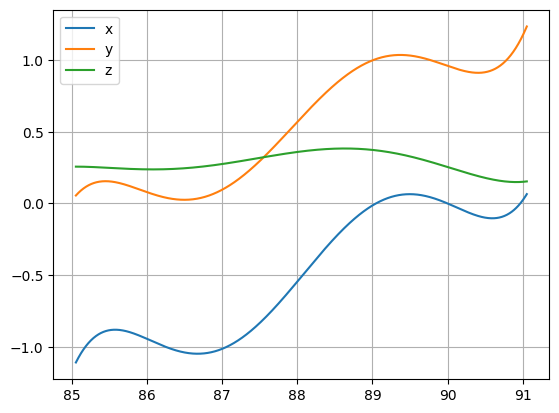

In [214]:
coef_x = df.iloc[test,:6]
poly_x = np.poly1d(coef_x)
plt.plot(t,poly_x(t),label="x")

coef_y = df.iloc[test,6:12]
poly_y = np.poly1d(coef_y)
plt.plot(t,poly_y(t),label="y")

coef_z = df.iloc[test,12:]
poly_z = np.poly1d(coef_z)
plt.plot(t,poly_z(t),label="z")

plt.grid()
plt.legend()
plt.show()

### **Splines**

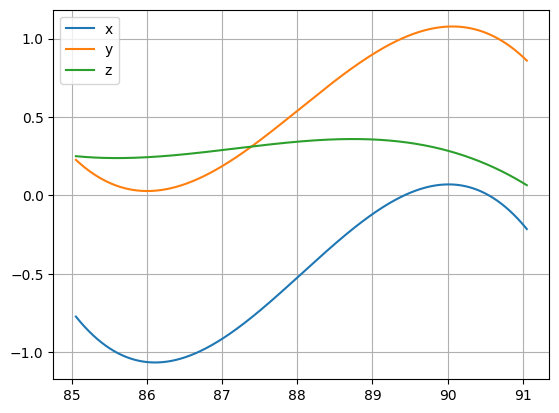

In [215]:
tck_x = splrep(t,x,s=25)
spline_x = splev(t,tck_x)

tck_y = splrep(t,y,s=25)
spline_y = splev(t,tck_y)

tck_z = splrep(t,z,s=25)
spline_z = splev(t,tck_z)

plt.plot(t,spline_x,label='x')
plt.plot(t,spline_y,label='y')
plt.plot(t,spline_z,label='z')

plt.grid()
plt.legend()
plt.show()


### **Length**

In [216]:
def extrapolen(ls):

    # Create columns of the output dataset
    columns = ['len']
    df = pd.DataFrame(columns=columns)

    # Loop over all the .csv tables
    for i in np.arange(len(ls)): #da cambiare con len(ls)
        t = np.asarray(ls[i].t)
        row = len(t)
        df.loc[i] = row
    return df


dflen = extrapolen(li)
dflen

,len
0,1336
1,1674
2,1518
3,1457
4,1838
...,...
463,1838
464,1194
465,1160
466,1805


<Axes: >

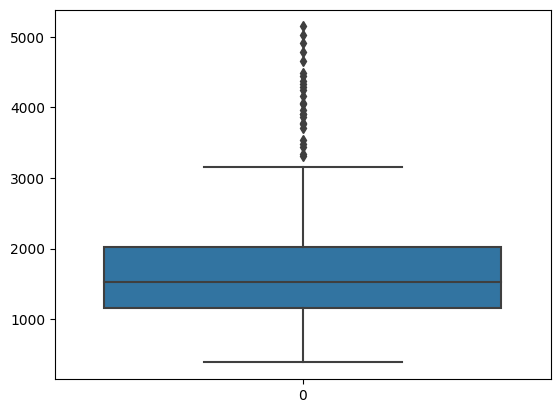

In [217]:
sns.boxplot(dflen.len)

(array([ 35., 148., 122.,  78.,  52.,   7.,   6.,   9.,   7.,   4.]),
 array([ 388. ,  863.8, 1339.6, 1815.4, 2291.2, 2767. , 3242.8, 3718.6,
        4194.4, 4670.2, 5146. ]),
 <BarContainer object of 10 artists>)

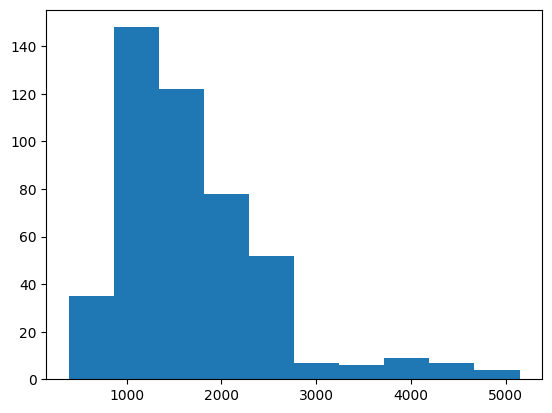

In [218]:
plt.hist(dflen.len)

In [219]:
dfc = pd.read_csv('classes.csv')
dfc

dflc = pd.concat([dflen,dfc],axis=1)
dflc

,len,code,class
0,1336,MR,1
1,1674,MR,1
2,1518,MR,1
3,1457,MR,1
4,1838,MR,1
...,...,...,...
463,1838,FB,2
464,1194,FF,2
465,1160,FF,2
466,1805,FS,2


<Axes: xlabel='class', ylabel='len'>

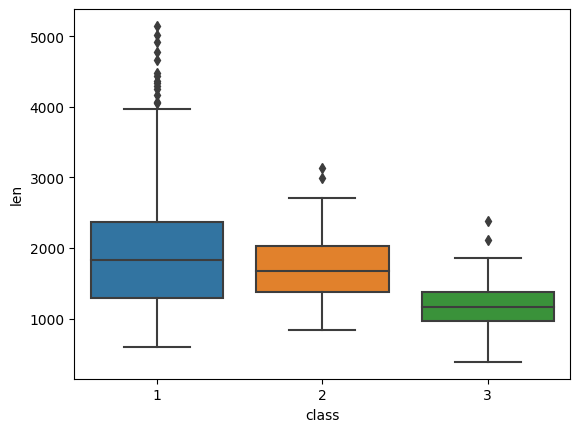

In [220]:
sns.boxplot(x='class',y='len', data=dflc)

### **Parameter Selection**

#### Means

<Axes: xlabel='class'>

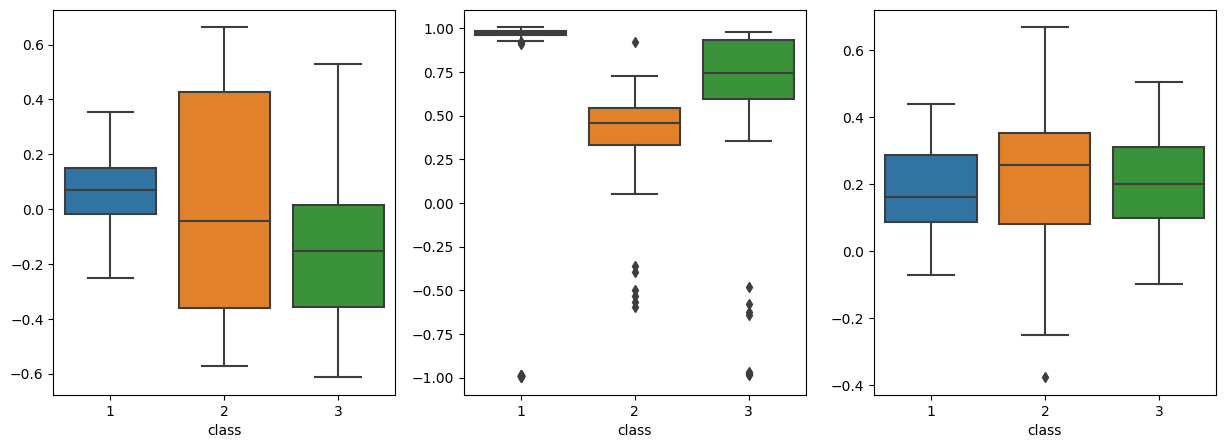

In [221]:
means_x = []
means_y = []
means_z = []

for i in np.arange(len(li)):
    means_x.append(li[i].x.mean())
    means_y.append(li[i].y.mean())
    means_z.append(li[i].z.mean())

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=means_x,data=dfc,ax=axs[0])
sns.boxplot(x='class',y=means_y,data=dfc,ax=axs[1])
sns.boxplot(x='class',y=means_z,data=dfc,ax=axs[2])

##### Variances

<Axes: xlabel='class'>

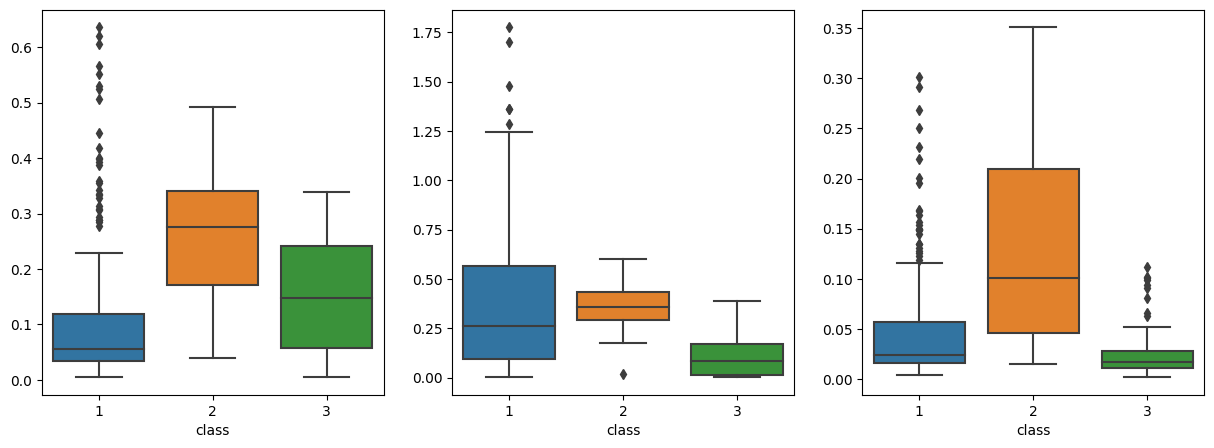

In [222]:
vars_x = []
vars_y = []
vars_z = []

for i in np.arange(len(li)):
    vars_x.append(li[i].x.var())
    vars_y.append(li[i].y.var())
    vars_z.append(li[i].z.var())

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=vars_x,data=dfc,ax=axs[0])
sns.boxplot(x='class',y=vars_y,data=dfc,ax=axs[1])
sns.boxplot(x='class',y=vars_z,data=dfc,ax=axs[2])

#### Max - Min & argMax - argMin

<Axes: xlabel='class'>

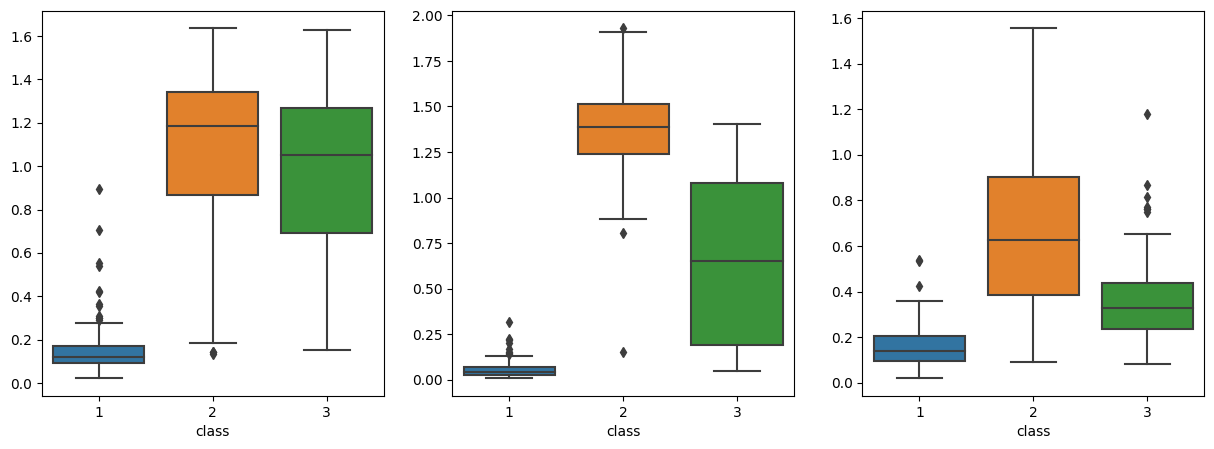

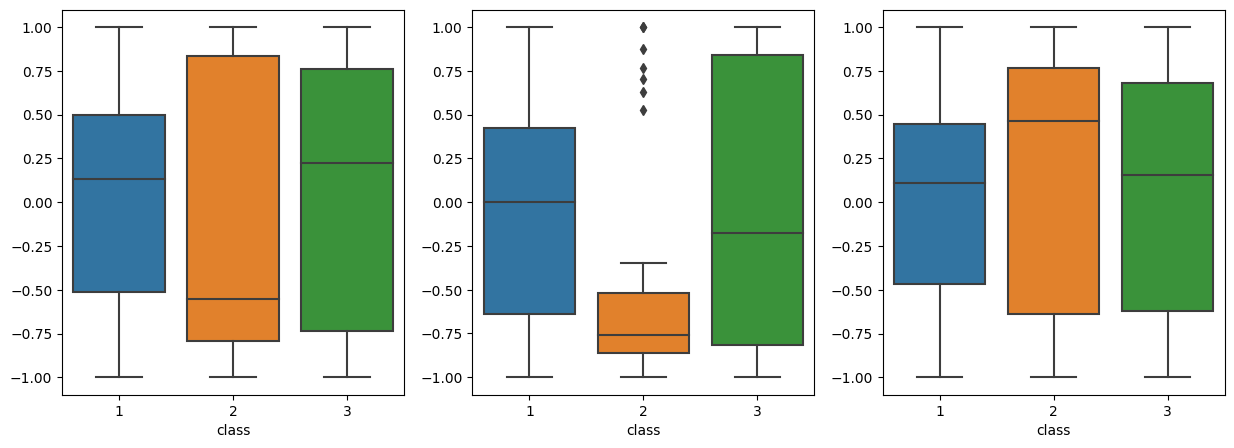

In [223]:
delta_x = []
deltarg_x = []
delta_y = []
deltarg_y = []
delta_z = []
deltarg_z = []

for i in np.arange(len(df)):

    t = np.asarray(li[i].t)
    len_t = len(li[i])

    coef_x = df.iloc[i,:6]
    poly_x = np.poly1d(coef_x)
    delta_x.append(np.max(poly_x(t))-np.min(poly_x(t)))
    deltarg_x.append((np.argmax(poly_x(t))-np.argmin(poly_x(t)))/len_t)

    coef_y = df.iloc[i,6:12]
    poly_y = np.poly1d(coef_y)
    delta_y.append(np.max(poly_y(t))-np.min(poly_y(t)))
    deltarg_y.append((np.argmax(poly_y(t))-np.argmin(poly_y(t)))/len_t)

    coef_z = df.iloc[i,12:]
    poly_z = np.poly1d(coef_z)
    delta_z.append(np.max(poly_z(t))-np.min(poly_z(t)))
    deltarg_z.append((np.argmax(poly_z(t))-np.argmin(poly_z(t)))/len_t)

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=delta_x,data=dfc,ax=axs[0])
sns.boxplot(x='class',y=delta_y,data=dfc,ax=axs[1])
sns.boxplot(x='class',y=delta_z,data=dfc,ax=axs[2])

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=deltarg_x,data=dfc,ax=axs[0])
sns.boxplot(x='class',y=deltarg_y,data=dfc,ax=axs[1])
sns.boxplot(x='class',y=deltarg_z,data=dfc,ax=axs[2])


#### Peaks over Threshold

<Axes: xlabel='class'>

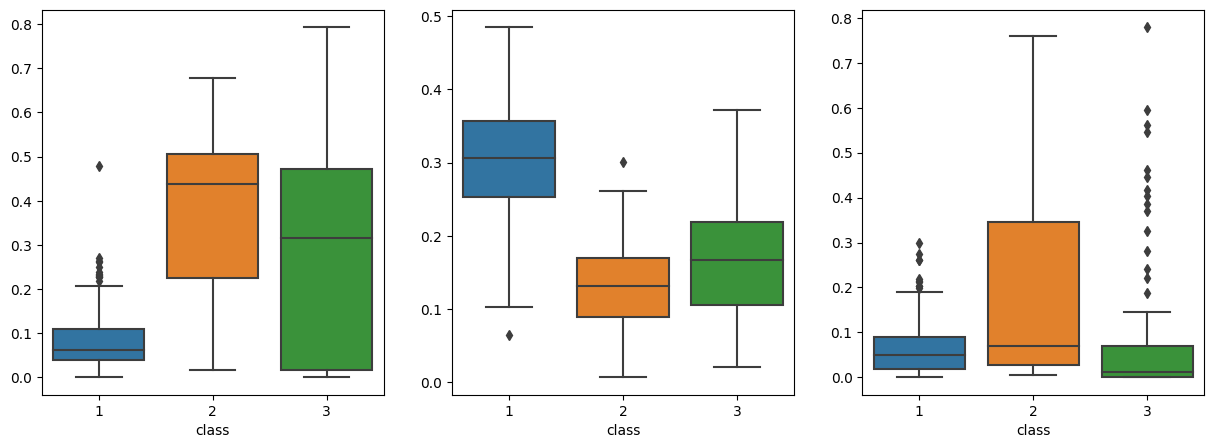

In [224]:
peaks_x = []
peaks_y = []
peaks_z = []
eps_x = 0.5
eps_y = 1
eps_z = 0.5

for i, item in enumerate(li):
    count_x, count_y, count_z = 0, 0, 0
    len_t = len(item.t)
    x_vals = item.x
    y_vals = item.y
    z_vals = item.z
    for j, t_val in enumerate(item.t):
        if abs(x_vals[j]) > eps_x:
            count_x += 1
        if abs(y_vals[j]) > eps_y:
            count_y += 1
        if abs(z_vals[j]) > eps_z:
            count_z += 1
    peaks_x.append(count_x/len_t)
    peaks_y.append(count_y/len_t)
    peaks_z.append(count_z/len_t)

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=peaks_x,data=dfc,ax=axs[0])
sns.boxplot(x='class',y=peaks_y,data=dfc,ax=axs[1])
sns.boxplot(x='class',y=peaks_z,data=dfc,ax=axs[2])

#### Positive/Tot

<Axes: xlabel='class'>

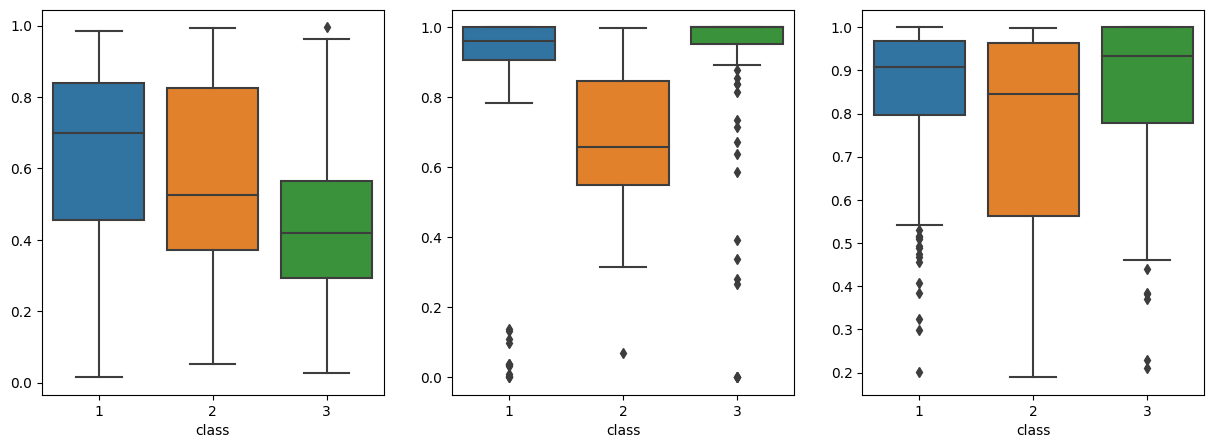

In [225]:
pn_x = []
pn_y = []
pn_z = []

for i in np.arange(len(li)):
    pos_x = li[i][li[i].x>=0].x.count()
    neg_x = li[i][li[i].x<0].x.count()

    pos_y = li[i][li[i].y>=0].y.count()
    neg_y = li[i][li[i].y<0].y.count()

    pos_z = li[i][li[i].z>=0].z.count()
    neg_z = li[i][li[i].z<0].z.count()

    pn_x.append(pos_x/(pos_x+neg_x))
    pn_y.append(pos_y/(pos_y+neg_y))
    pn_z.append(pos_z/(pos_z+neg_z))

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=pn_x,data=dfc,ax=axs[0])
sns.boxplot(x='class',y=pn_y,data=dfc,ax=axs[1])
sns.boxplot(x='class',y=pn_z,data=dfc,ax=axs[2])

#### Energy

<Axes: xlabel='class'>

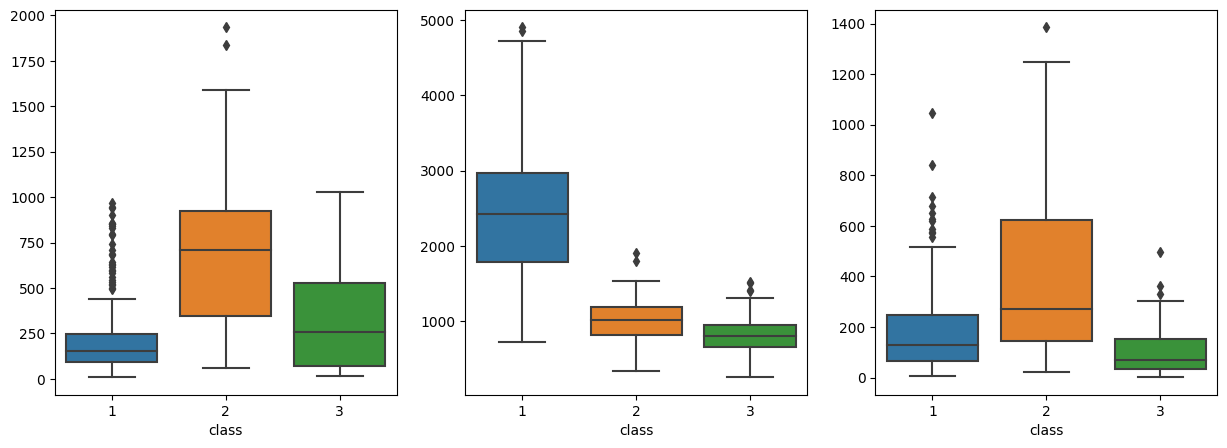

In [226]:
energies_x = []
energies_y = []
energies_z = []

for i in np.arange(len(li)):

    en_x = np.sum(li[i].x**2)
    en_y = np.sum(li[i].y**2)
    en_z = np.sum(li[i].z**2)
    en_tot = np.sum(li[i].x**2+li[i].y**2+li[i].z**2)

    energies_x.append(en_x)
    energies_y.append(en_y)
    energies_z.append(en_z)

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=energies_x,data=dfc,ax=axs[0])
sns.boxplot(x='class',y=energies_y,data=dfc,ax=axs[1])
sns.boxplot(x='class',y=energies_z,data=dfc,ax=axs[2])

#### Power

<Axes: xlabel='class'>

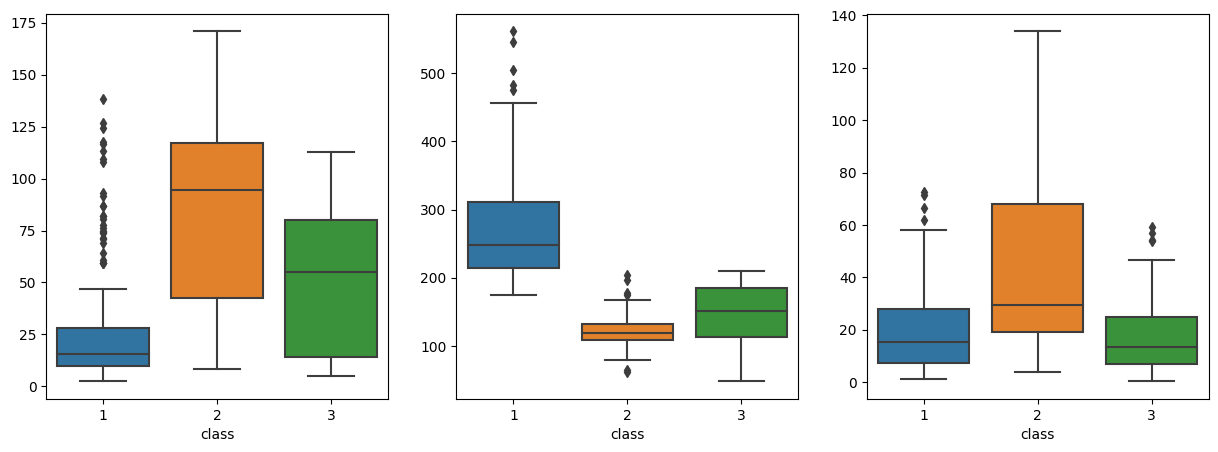

In [227]:
powers_x = []
powers_y = []
powers_z = []

for i in np.arange(len(li)):

    duration = li[i].t[len(li[i])-1]-li[i].t[0]
    pow_x = np.sum(li[i].x**2)/duration
    pow_y = np.sum(li[i].y**2)/duration
    pow_z = np.sum(li[i].z**2)/duration
    en_tot = np.sum(li[i].x**2+li[i].y**2+li[i].z**2)

    powers_x.append(pow_x)
    powers_y.append(pow_y)
    powers_z.append(pow_z)

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=powers_x,data=dfc,ax=axs[0])
sns.boxplot(x='class',y=powers_y,data=dfc,ax=axs[1])
sns.boxplot(x='class',y=powers_z,data=dfc,ax=axs[2])

#### Median

<Axes: xlabel='class'>

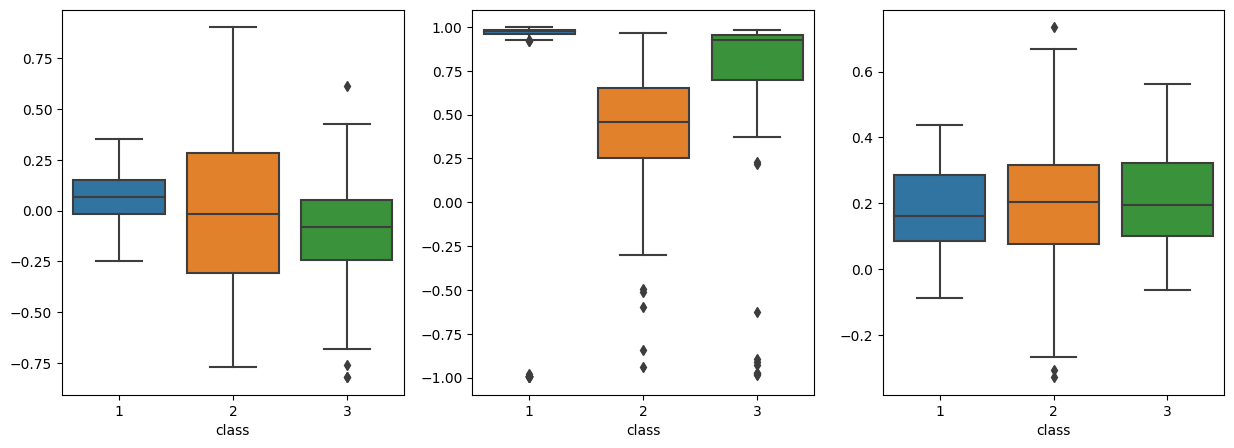

In [228]:
median_x = []
median_y = []
median_z = []

for i in np.arange(len(li)):
    t = np.asarray(li[i].t)

    coef_x = df.iloc[i,:6]
    poly_x = np.poly1d(coef_x)
    median_x.append(np.median(poly_x(t)))

    coef_y = df.iloc[i,6:12]
    poly_y = np.poly1d(coef_y)
    median_y.append(np.median(poly_y(t)))

    coef_z = df.iloc[i,12:]
    poly_z = np.poly1d(coef_z)
    median_z.append(np.median(poly_z(t)))

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=median_x,data=dfc,ax=axs[0])
sns.boxplot(x='class',y=median_y,data=dfc,ax=axs[1])
sns.boxplot(x='class',y=median_z,data=dfc,ax=axs[2])



#### Mode

<Axes: xlabel='class'>

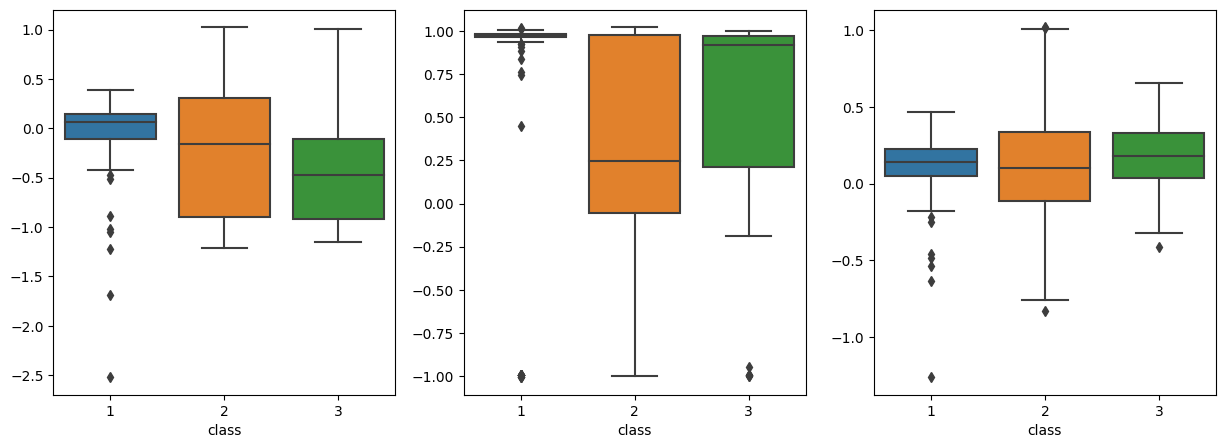

In [229]:
from scipy import stats

mode_x = []
mode_y = []
mode_z = []

for i in np.arange(len(li)):
    mode_x.append(stats.mode(li[i].x, keepdims = True)[0][0])
    mode_y.append(stats.mode(li[i].y, keepdims = True)[0][0])
    mode_z.append(stats.mode(li[i].z, keepdims = True)[0][0])

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=mode_x,data=dfc,ax=axs[0])
sns.boxplot(x='class',y=mode_y,data=dfc,ax=axs[1])
sns.boxplot(x='class',y=mode_z,data=dfc,ax=axs[2])


#### Skewness

<Axes: xlabel='class'>

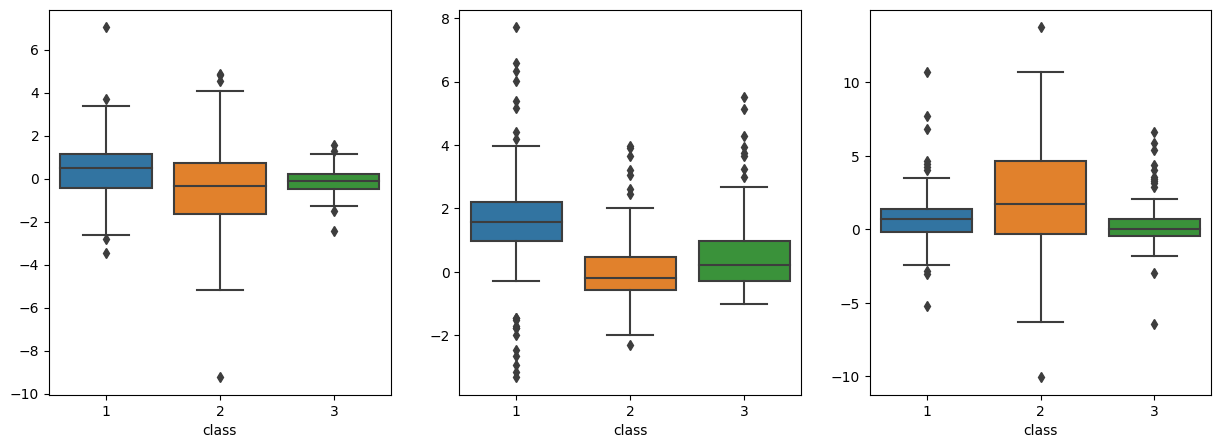

In [230]:
from scipy.stats import skew

skew_x = []
skew_y = []
skew_z = []

for i in np.arange(len(li)):
    skew_x.append(skew(li[i].x))
    skew_y.append(skew(li[i].y))
    skew_z.append(skew(li[i].z))

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=skew_x,data=dfc,ax=axs[0])
sns.boxplot(x='class',y=skew_y,data=dfc,ax=axs[1])
sns.boxplot(x='class',y=skew_z,data=dfc,ax=axs[2])



#### Kurtosis

(-10.0, 160.0)

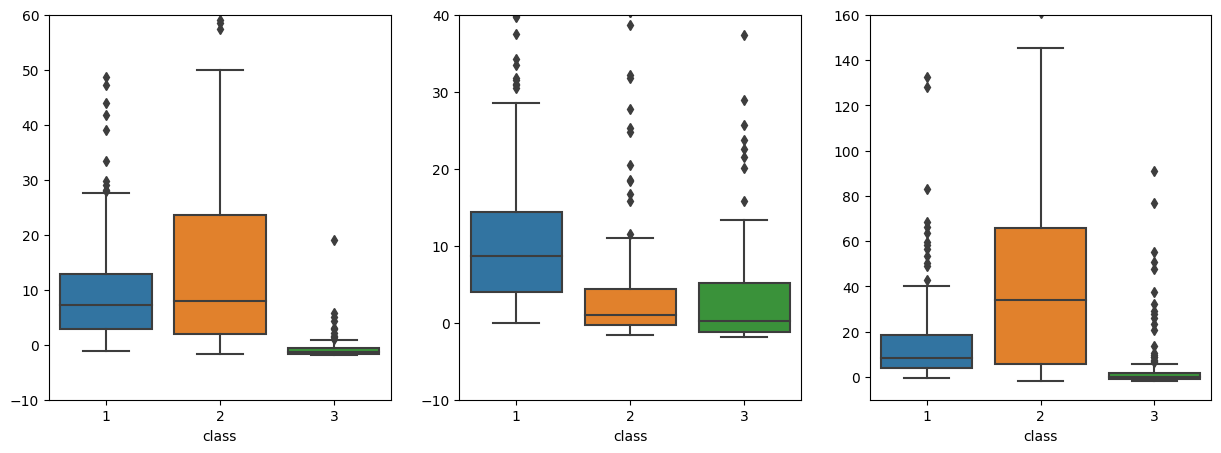

In [231]:
from scipy.stats import kurtosis

kurtosis_x = []
kurtosis_y = []
kurtosis_z = []

for i in np.arange(len(li)):
    kurtosis_x.append(kurtosis(li[i].x))
    kurtosis_y.append(kurtosis(li[i].y))
    kurtosis_z.append(kurtosis(li[i].z))

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=kurtosis_x,data=dfc,ax=axs[0])
axs[0].set_ylim(-10,60)
sns.boxplot(x='class',y=kurtosis_y,data=dfc,ax=axs[1])
axs[1].set_ylim(-10,40)
sns.boxplot(x='class',y=kurtosis_z,data=dfc,ax=axs[2])
axs[2].set_ylim(-10,160)



#### RMS

<Axes: xlabel='class'>

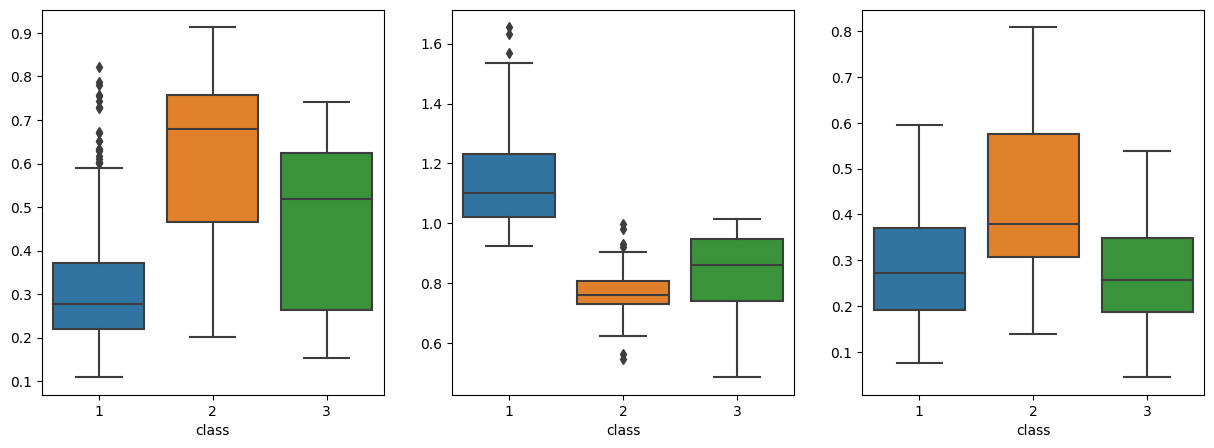

In [232]:
rms_x = []
rms_y = []
rms_z = []

for i in np.arange(len(li)):
    rms_x.append(np.sqrt(np.mean(np.square(li[i].x))))
    rms_y.append(np.sqrt(np.mean(np.square(li[i].y))))
    rms_z.append(np.sqrt(np.mean(np.square(li[i].z))))

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=rms_x,data=dfc,ax=axs[0])

sns.boxplot(x='class',y=rms_y,data=dfc,ax=axs[1])

sns.boxplot(x='class',y=rms_z,data=dfc,ax=axs[2])




#### Temporal_centroid

<Axes: xlabel='class'>

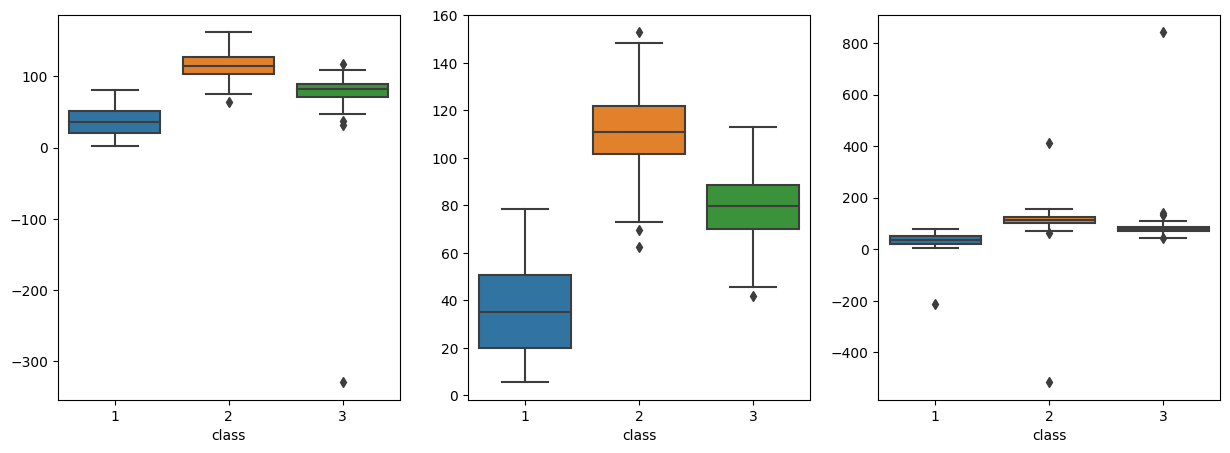

In [233]:
temporal_centroid_x = []
temporal_centroid_y = []
temporal_centroid_z = []

for i in np.arange(len(li)):
    fs = li[i].t[2]-li[i].t[1]
    temporal_centroid_x.append(np.sum(li[i].t * li[i].x) / np.sum(li[i].x))
    temporal_centroid_y.append(np.sum(li[i].t * li[i].y) / np.sum(li[i].y))
    temporal_centroid_z.append(np.sum(li[i].t * li[i].z) / np.sum(li[i].z))

fig, axs = plt.subplots(ncols=3, figsize=(15,5))

sns.boxplot(x='class',y=temporal_centroid_x,data=dfc,ax=axs[0])

sns.boxplot(x='class',y=temporal_centroid_y,data=dfc,ax=axs[1])

sns.boxplot(x='class',y=temporal_centroid_z,data=dfc,ax=axs[2])

### **Create dataset**

In [234]:
columns = []
for prefix in ['x', 'y', 'z']:
    columns.append(f"mean_{prefix}")
    columns.append(f"var_{prefix}")
    
data = pd.DataFrame({'mean_x': means_x,
                     'mean_y': means_y,
                     'mean_z': means_z,
                     'var_x': vars_x,
                     'var_y': vars_y,
                     'var_z': vars_z,
                     'max-min_x': delta_x,
                     'max-min_y': delta_y,
                     'max-min_z': delta_z,
                     '%_peaks_x': peaks_x,
                     '%_peaks_y': peaks_y,
                     '%_peaks_z': peaks_z,
                     '%_positive_x': pn_x,
                     '%_positive_y': pn_y,
                     '%_positive_z': pn_z,
                     'power_x': powers_x,
                     'power_y': powers_y,
                     'power_z': powers_z,
                     'temporal_centroid_x': temporal_centroid_x,
                     'temporal_centroid_y': temporal_centroid_y,
                     'temporal_centroid_z': temporal_centroid_z
                    })
            
data = pd.concat([data,dflc],axis=1)
data = data.drop('code',axis=1)

data.to_csv('data.csv', index=False)

### **Classification**

In [235]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1].values

In [236]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Create a logistic regression model
clf = LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg')

# Fit the model using the training data
clf.fit(X_train, y_train)

# Evaluate the model using the test data
score = clf.score(X_test, y_test)
print("Accuracy:", score)

# Predict the classes using the test data
y_pred = clf.predict(X_test)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Accuracy: 0.9572649572649573
[[51  0  0]
 [ 0 27  3]
 [ 0  2 34]]


In [237]:
from lazypredict.Supervised import LazyClassifier
cls= LazyClassifier(verbose=0,ignore_warnings=False, custom_metric=None)
models, predictions = cls.fit(X_train, X_test, y_train, y_test)

  0%|          | 0/29 [00:00<?, ?it/s]

ROC AUC couldn't be calculated for AdaBoostClassifier

 14%|█▍        | 4/29 [00:00<00:01, 15.80it/s]


multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for BaggingClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for BernoulliNB
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for CalibratedClassifierCV
multi_class must be in ('ovo', 'ovr')
CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)
ROC AUC couldn't be calculated for DecisionTreeClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for DummyClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for ExtraTreeClassifier
multi_class must be in ('ovo', 'ovr')


 52%|█████▏    | 15/29 [00:00<00:00, 34.89it/s]

ROC AUC couldn't be calculated for ExtraTreesClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for GaussianNB
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for KNeighborsClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for LabelPropagation
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for LabelSpreading
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for LinearDiscriminantAnalysis
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for LinearSVC
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for LogisticRegression
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for NearestCentroid
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for NuSVC
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for PassiveAggressiveClassifier
multi_class must be in ('ovo', 'ovr')
ROC AU

 76%|███████▌  | 22/29 [00:00<00:00, 29.74it/s]

ROC AUC couldn't be calculated for RandomForestClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for RidgeClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for RidgeClassifierCV
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for SGDClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for SVC
multi_class must be in ('ovo', 'ovr')
StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'
XGBClassifier model failed to execute
Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got [1 2 3]


100%|██████████| 29/29 [00:01<00:00, 25.16it/s]

ROC AUC couldn't be calculated for LGBMClassifier
multi_class must be in ('ovo', 'ovr')


In [238]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.98291,0.98148,None,0.98294,0.28497
LogisticRegression,0.98291,0.97963,None,0.98291,0.01643
ExtraTreesClassifier,0.96581,0.96111,None,0.96587,0.11159
SVC,0.96581,0.96111,None,0.96558,0.01270
SGDClassifier,0.96581,0.96111,None,0.96587,0.01621
RandomForestClassifier,0.96581,0.96111,None,0.96587,0.19500
LinearSVC,0.96581,0.96111,None,0.96587,0.01264
CalibratedClassifierCV,0.96581,0.96111,None,0.96587,0.06282
Perceptron,0.96581,0.95556,None,0.96549,0.01268


In [239]:
# classifica con random forest il dataset data
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

# Fit the model using the training data
clf.fit(X_train, y_train)

# Evaluate the model using the test data
score = clf.score(X_test, y_test)
print("Accuracy:", score)

# Predict the classes using the test data
y_pred = clf.predict(X_test)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# crea un dataset check con la classe originale e la classe predetta
check = pd.DataFrame({'true': y_test, 'pred': y_pred})
check

Accuracy: 1.0
[[47  0  0]
 [ 0 23  0]
 [ 0  0 24]]


,true,pred
0,1,1
1,3,3
2,1,1
3,2,2
4,1,1
...,...,...
89,2,2
90,3,3
91,1,1
92,3,3


In [240]:
# classifica con SVM il dataset data
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Create a SVM classifier
clf = SVC(kernel='linear')

# Fit the model using the training data
clf.fit(X_train, y_train)

# Evaluate the model using the test data
score = clf.score(X_test, y_test)
print("Accuracy:", score)

# Predict the classes using the test data
y_pred = clf.predict(X_test)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# crea un dataset check con la classe originale e la classe predetta
check = pd.DataFrame({'true': y_test, 'pred': y_pred})
check


Accuracy: 0.9787234042553191
[[47  0  0]
 [ 0 23  0]
 [ 1  1 22]]


,true,pred
0,1,1
1,3,3
2,1,1
3,2,2
4,1,1
...,...,...
89,2,2
90,3,3
91,1,1
92,3,3


In [241]:
# scegli con 10 fold cross validation il modello migliore
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Create a list of models
models = [LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg'),
            RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0),
            SVC(kernel='linear')]
# Create a list of model names
model_names = ['Logistic Regression', 'Random Forest', 'SVM']

# Loop through the models
for model, name in zip(models, model_names):
    # Calculate the accuracy score of the model using 10-fold cross validation
    score = cross_val_score(model, X, y, cv=10)
    # Print the name and score of the model
    print(f"{name}: {score.mean()}")

Logistic Regression: 0.9678075855689178
Random Forest: 0.9592044403330249
SVM: 0.950786308973173


In [242]:
# usa lazy predict per scegliere il modello migliore
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.25,random_state =123)

# Create a lazy classifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)

# Fit the model using the training data
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

models

100%|██████████| 29/29 [00:01<00:00, 26.15it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LinearSVC,0.99145,0.99425,None,0.99148,0.01514
CalibratedClassifierCV,0.99145,0.99425,None,0.99148,0.06404
SGDClassifier,0.99145,0.99425,None,0.99148,0.01360
LogisticRegression,0.99145,0.99425,None,0.99148,0.01771
Perceptron,0.98291,0.98415,None,0.98295,0.01074
ExtraTreesClassifier,0.98291,0.98143,None,0.98304,0.10787
RandomForestClassifier,0.98291,0.98143,None,0.98304,0.18888
PassiveAggressiveClassifier,0.98291,0.98143,None,0.98304,0.00968
SVC,0.97436,0.97405,None,0.97424,0.01331


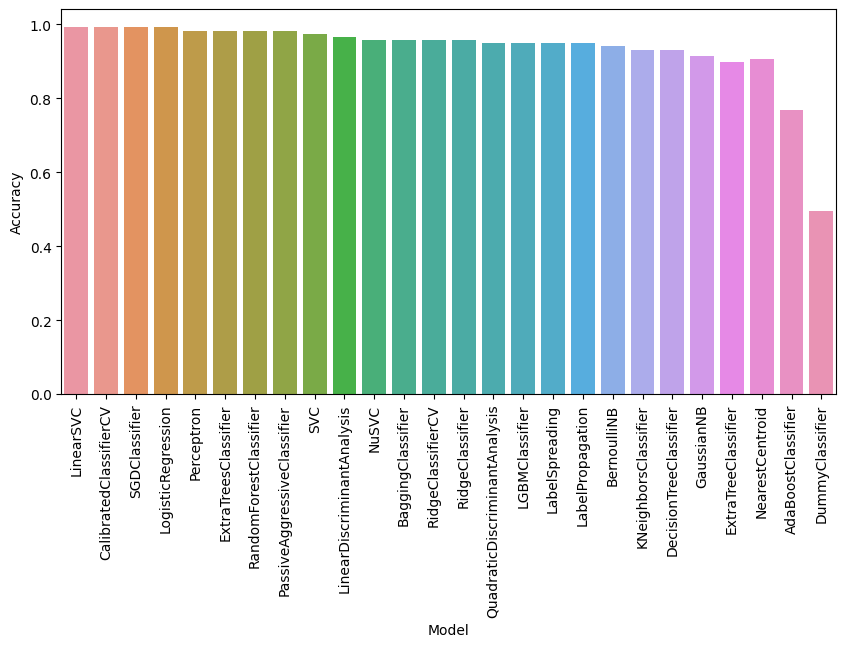

In [243]:
# visualizza i risultati
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure
plt.figure(figsize=(10, 5))

# Create a barplot of the model accuracy
sns.barplot(x=models.index, y=models['Accuracy'])

# Rotate tick marks on x-axis
plt.xticks(rotation=90)

# Create labels
plt.xlabel("Model")
plt.ylabel("Accuracy")

# Show plot
plt.show()

Accuracy: 1.0
[[47  0  0]
 [ 0 23  0]
 [ 0  0 24]]


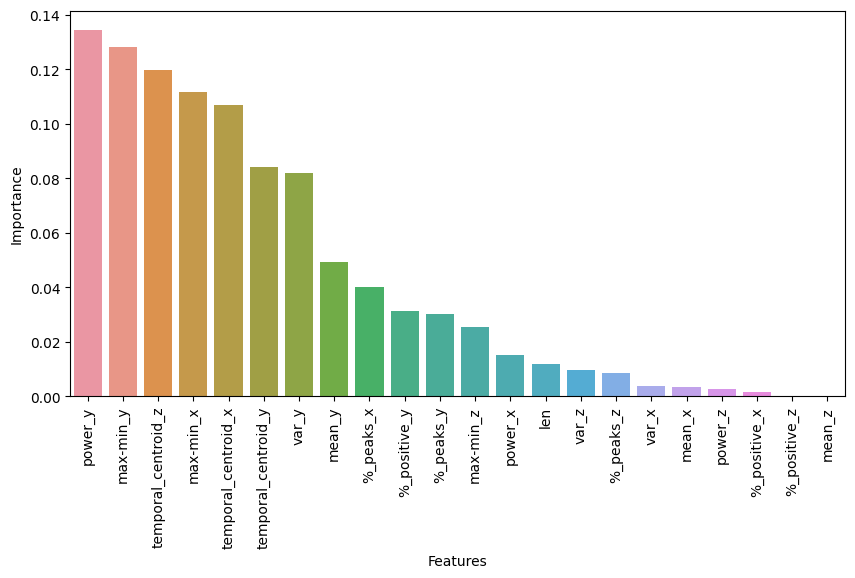

In [244]:
# fai feature importance con random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

# Fit the model using the training data
clf.fit(X_train, y_train)

# Evaluate the model using the test data
score = clf.score(X_test, y_test)
print("Accuracy:", score)

# Predict the classes using the test data
y_pred = clf.predict(X_test)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# crea un dataset check con la classe originale e la classe predetta
check = pd.DataFrame({'true': y_test, 'pred': y_pred})
check

# Get the feature importances
importances = clf.feature_importances_

# Create a dataframe of feature importances, sorted descendingly
data = pd.DataFrame({'feature': X.columns,
                        'importance': importances}).sort_values('importance', ascending=False)

# Display the first 10 most important features
data.head(10)

# Create a figure
plt.figure(figsize=(10, 5))

# Create a barplot of the feature importances
sns.barplot(x=data.feature, y=data.importance)

# Rotate tick marks on x-axis
plt.xticks(rotation=90)

# Create labels
plt.xlabel("Features")
plt.ylabel("Importance")

# Show plot
plt.show()

In [245]:
# prova con vari seed e salva in una tabella accuracy, precision, recall, f1
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from IPython.display import display

pd.options.display.float_format = '{:,.5f}'.format

# Create lists for the scores
accs, precs, recs, f1s = [], [], [], []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Loop through different random seeds
for i in range(10):
    # Create a random forest classifier
    clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=i)

    # Fit the model using the training data
    clf.fit(X_train, y_train)

    # Predict the classes using the test data
    y_pred = clf.predict(X_test)

    # Append the scores to the respective lists
    accs.append(accuracy_score(y_test, y_pred))
    precs.append(precision_score(y_test, y_pred, average='macro'))
    recs.append(recall_score(y_test, y_pred, average='macro'))
    f1s.append(f1_score(y_test, y_pred, average='macro'))

    cm = confusion_matrix(y_test, y_pred)
    print(cm, '\n\n')

# Create a dataframe of the scores
scores = pd.DataFrame({'accuracy': accs,
                        'precision': precs,
                        'recall': recs,
                        'f1': f1s})

# Print the mean scores
scores

[[42  0  0]
 [ 0 21  1]
 [ 0  3 27]] 


[[42  0  0]
 [ 0 21  1]
 [ 0  4 26]] 


[[42  0  0]
 [ 0 21  1]
 [ 0  2 28]] 


[[42  0  0]
 [ 0 21  1]
 [ 0  3 27]] 


[[42  0  0]
 [ 0 21  1]
 [ 0  3 27]] 


[[42  0  0]
 [ 0 21  1]
 [ 0  4 26]] 


[[42  0  0]
 [ 0 21  1]
 [ 0  3 27]] 


[[42  0  0]
 [ 0 21  1]
 [ 0  3 27]] 


[[42  0  0]
 [ 0 21  1]
 [ 0  4 26]] 


[[42  0  0]
 [ 0 21  1]
 [ 0  3 27]] 




,accuracy,precision,recall,f1
0,0.95745,0.94643,0.95152,0.94803
1,0.94681,0.93432,0.94040,0.93530
2,0.96809,0.95952,0.96263,0.96083
3,0.95745,0.94643,0.95152,0.94803
4,0.95745,0.94643,0.95152,0.94803
5,0.94681,0.93432,0.94040,0.93530
6,0.95745,0.94643,0.95152,0.94803
7,0.95745,0.94643,0.95152,0.94803
8,0.94681,0.93432,0.94040,0.93530
9,0.95745,0.94643,0.95152,0.94803


### **Cross-Validation**

#### SVM

In [246]:
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn import svm

svmc = svm.SVC(random_state=42)
param_grid = {
    'kernel': ['linear', 'poly', 'sigmoid', 'rbf'],
    'C': [0.1, 1, 10, 100, 1000],
    }  

grid_search_svm = GridSearchCV(estimator=svmc, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2)
grid_search_svm.fit(X_train, y_train)
print(grid_search_svm.best_params_)
print(grid_search_svm.best_score_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
{'C': 1000, 'kernel': 'rbf'}
0.9652916073968706


### Random Forest

In [247]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 10, 15, 20]
    }  

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)
print(grid_search_rf.best_params_)
print(grid_search_rf.best_score_)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
{'max_depth': 10, 'n_estimators': 100}
0.9785917496443813


### Logistic Regression

In [248]:
# logistic regression
from sklearn.linear_model import LogisticRegression

# Create a logistic regression classifier
reglog = LogisticRegression(random_state=42, multi_class='multinomial', solver='newton-cg')

scores = cross_validate(reglog, X_train, y_train, cv=10)

print(scores['test_score'].mean())

0.9626600284495023


### KNN

In [249]:
# knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# perform grid search cv
knn = KNeighborsClassifier()
params = {'n_neighbors': np.arange(1, 20)}
grid_search = GridSearchCV(knn, params, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'n_neighbors': 1}
0.9066145092460882


In [250]:
win_svm = svm.SVC(random_state=42, C=100, kernel='rbf')
win_rf = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
scores_svm = cross_validate(win_svm, X_train, y_train, cv=10, scoring=scoring)
scores_rf = cross_validate(win_rf, X_train, y_train, cv=10, scoring=scoring)
scores_reglog = cross_validate(reglog, X_train, y_train, cv=10, scoring=scoring)

# Create a dataframe with first column with names of models and second column with mean accuracy scores
scores = pd.DataFrame({'model': ['svm', 'rf', 'reglog'],
                       'accuracy': [scores_svm['test_accuracy'].mean(), scores_rf['test_accuracy'].mean(), scores_reglog['test_accuracy'].mean()],
                       'precision': [scores_svm['test_precision_macro'].mean(), scores_rf['test_precision_macro'].mean(), scores_reglog['test_precision_macro'].mean()],
                       'recall': [scores_svm['test_recall_macro'].mean(), scores_rf['test_recall_macro'].mean(), scores_reglog['test_recall_macro'].mean()],
                       'f1': [scores_svm['test_f1_macro'].mean(), scores_rf['test_f1_macro'].mean(), scores_reglog['test_f1_macro'].mean()]
                       })

# Print the dataframe
scores

,model,accuracy,precision,recall,f1
0,svm,0.96522,0.96174,0.95722,0.95810
1,rf,0.97589,0.97302,0.97230,0.97099
2,reglog,0.96266,0.95993,0.95261,0.95394


In [251]:
from sklearn.metrics import confusion_matrix

win_rf.fit(X_train, y_train)
y_pred = win_rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[42  0  0]
 [ 0 21  1]
 [ 0  3 27]]


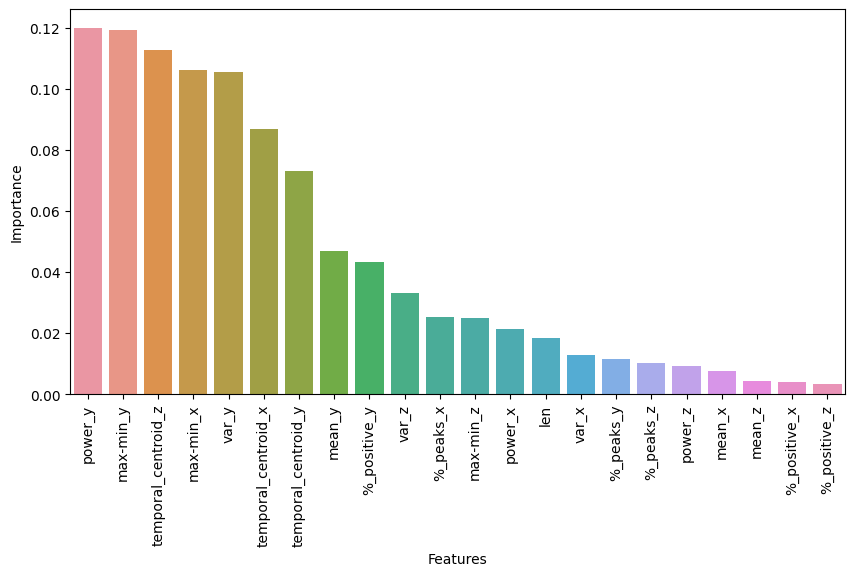

In [252]:
# Get the feature importances
importances = win_rf.feature_importances_

# Create a dataframe of feature importances, sorted descendingly
feat = pd.DataFrame({'feature': X.columns,
                     'importance': importances}).sort_values('importance', ascending=False)

# Create a figure
plt.figure(figsize=(10, 5))

# Create a barplot of the feature importances
sns.barplot(x=feat.feature, y=feat.importance)

# Rotate tick marks on x-axis
plt.xticks(rotation=90)

# Create labels
plt.xlabel("Features")
plt.ylabel("Importance")

# Show plot
plt.show()

In [253]:
XXX = X.iloc[:,feat.index[:10]]

# Split the data into train and test sets
XXX_train, XXX_test, y_train, y_test = train_test_split(XXX, y, test_size=0.2, random_state=42)
win_rf.fit(XXX_train, y_train)
y_pred = win_rf.predict(XXX_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

# get scores
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred, average='macro'))
print(recall_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='macro'))

[[48  0  0]
 [ 0 20  0]
 [ 1  1 24]]
0.9787234042553191
0.9773242630385487
0.9743589743589745
0.9751001592490152


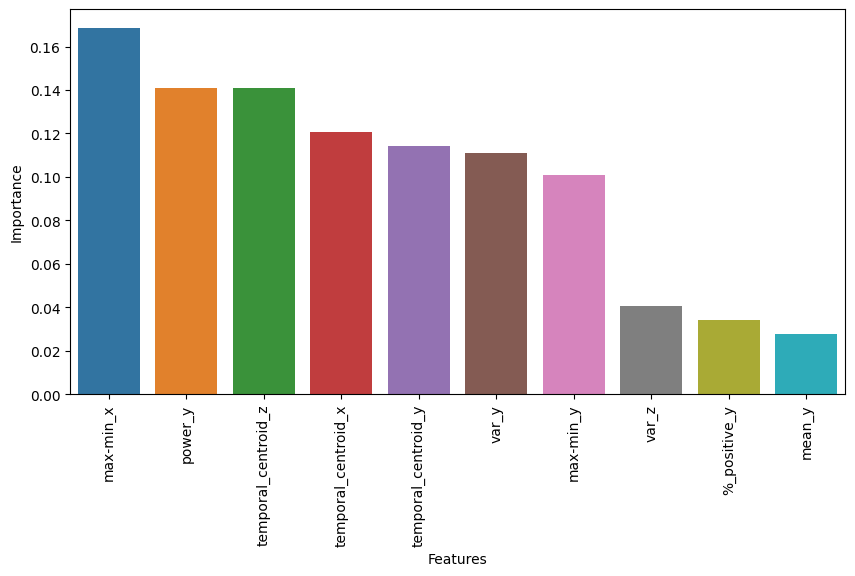

In [254]:
# Get the feature importances
importances = win_rf.feature_importances_

# Create a dataframe of feature importances, sorted descendingly
feat = pd.DataFrame({'feature': XXX.columns,
                     'importance': importances}).sort_values('importance', ascending=False)

# Create a figure
plt.figure(figsize=(10, 5))

# Create a barplot of the feature importances
sns.barplot(x=feat.feature, y=feat.importance)

# Rotate tick marks on x-axis
plt.xticks(rotation=90)

# Create labels
plt.xlabel("Features")
plt.ylabel("Importance")

# Show plot
plt.show()